<a href="https://colab.research.google.com/github/rodrigodesouza7/data-observability-platform/blob/main/detector_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# 🧠 DETECTOR DE ANOMALIAS EM DADOS NUMÉRICOS
# Módulo para identificar valores atípicos na coluna `valor_compra`
# Técnicas: Z-score e IQR (Intervalo Interquartil)
# ============================================================



# ============================================================
# 📚 1. BIBLIOTECAS
# ============================================================


In [ ]:
# ============================================================
# 📚 1. BIBLIOTECAS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ============================================================
# 📂 2. LEITURA DO DATASET ORIGINAL
# ============================================================


In [ ]:
# ============================================================
# 📂 2. LEITURA DO DATASET ORIGINAL
# ============================================================

# Lê o dataset com dados simulados
df = pd.read_csv("dados_simulados_com_anomalias.csv")

# Exibe as 5 primeiras linhas para conferência
display(df.head())


,id_venda,data_venda,nome_cliente,email_cliente,valor_compra,produto,status_pagamento
0,8a44ed7f-3519-41a8-9745-efc9464a2c4a,2025-05-04T16:46:23,Ana Sophia Araújo,levicunha@ig.com.br,-9999.99,Esportes,aprovado
1,c808715a-d95a-4302-a6ef-e2af9ec95ec7,2050-01-01T00:00:00,Renan Viana,bazevedo@da.com,1846.45,Esportes,aprovado
2,e03dad1c-24b0-41ac-a7a1-d61e7caa1f65,2025-05-22T16:46:23,Catarina Viana,ana-liviafreitas@gmail.com,-9999.99,Eletrônicos,aprovado
3,56737faf-3b98-4729-8e72-876ca8336f3e,2050-01-01T00:00:00,Samuel Pereira,henrique35@gmail.com,1273.28,Eletrônicos,aprovado
4,8b56101f-7486-47b6-b08e-ab6917e21f72,2025-05-11T16:46:23,João Miguel Castro,invalido_email,566.69,Beleza,aprovado


# ============================================================
# 📈 3. DETECÇÃO DE OUTLIERS – MÉTODO Z-SCORE
# ============================================================

In [ ]:
def detectar_outliers_zscore(df: pd.DataFrame, coluna: str, threshold: float = 3.0) -> pd.Series:
    """
    Detecta outliers com base em Z-Score.
    Retorna uma série booleana indicando se o valor é um outlier.
    """
    media = df[coluna].mean()
    desvio = df[coluna].std()
    z_scores = (df[coluna] - media) / desvio
    return abs(z_scores) > threshold


# ============================================================
# 📊 4. DETECÇÃO DE OUTLIERS – MÉTODO IQR
# ============================================================

In [ ]:
# ============================================================
# 📊 4. DETECÇÃO DE OUTLIERS – MÉTODO IQR
# ============================================================

def detectar_outliers_iqr(df: pd.DataFrame, coluna: str) -> pd.Series:
    """
    Detecta outliers com base no Intervalo Interquartil (IQR).
    """
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)


# ============================================================
# 🧪 5. EXECUÇÃO DAS DUAS TÉCNICAS
# ============================================================


In [ ]:
# ============================================================
# 🧪 5. EXECUÇÃO DAS DUAS TÉCNICAS
# ============================================================

# Aplicar Z-Score
df["anomalia_zscore"] = detectar_outliers_zscore(df, "valor_compra")

# Aplicar IQR
df["anomalia_iqr"] = detectar_outliers_iqr(df, "valor_compra")

# Marcar se ao menos um dos métodos detectou como anômalo
df["possivel_anomalia"] = df["anomalia_zscore"] | df["anomalia_iqr"]

# Total de anomalias detectadas
total = df["possivel_anomalia"].sum()
print(f"🚨 Total de possíveis anomalias detectadas: {total}")

# Visualizar algumas anomalias
display(df[df["possivel_anomalia"] == True].head(10))


🚨 Total de possíveis anomalias detectadas: 35


,id_venda,data_venda,nome_cliente,email_cliente,valor_compra,produto,status_pagamento,anomalia_zscore,anomalia_iqr,possivel_anomalia
0,8a44ed7f-3519-41a8-9745-efc9464a2c4a,2025-05-04T16:46:23,Ana Sophia Araújo,levicunha@ig.com.br,-9999.99,Esportes,aprovado,True,True,True
2,e03dad1c-24b0-41ac-a7a1-d61e7caa1f65,2025-05-22T16:46:23,Catarina Viana,ana-liviafreitas@gmail.com,-9999.99,Eletrônicos,aprovado,True,True,True
10,30e9d63b-af11-4b16-a7bb-440a77dbcc8c,2025-05-06T16:46:23,Raquel Lopes,pnovaes@da.org,-9999.99,Eletrônicos,aprovado,True,True,True
12,9cc7f840-4464-4c1a-b641-a122696c7ec6,2025-05-12T16:46:23,Luiz Gustavo Sales,correiahenrique@pereira.br,-9999.99,Esportes,pendente,True,True,True
14,a0fd4e57-79f8-4f8f-a016-124dbc3c8f74,2025-05-05T16:46:23,Vitor Mendes,ana-julia27@ferreira.com,-9999.99,Beleza,aprovado,True,True,True
15,4699c19e-724d-4504-943a-e927776fc257,2025-05-10T16:46:23,Ana Lívia Jesus,viniciusda-cruz@martins.com,-9999.99,Esportes,aprovado,True,True,True
19,dad9e31b-a7f3-4879-b431-ededac302f9d,2025-04-26T16:46:23,Ana Vitória Farias,mendesaugusto@das.com,-9999.99,Alimentos,aprovado,True,True,True
21,434702ad-7042-450b-930a-0c0db06738b9,2025-05-11T16:46:23,Luiza da Rosa,yfarias@oliveira.net,-9999.99,Alimentos,aprovado,True,True,True
22,92911b7c-beff-4bd6-84c8-d1f11e027764,2025-05-08T16:46:23,Caio Pinto,doliveira@ig.com.br,-9999.99,Eletrônicos,pendente,True,True,True
35,9ef76536-288e-4ce0-b3e6-77832de6da00,2025-05-19T16:46:23,Sra. Cecília Ferreira,calebe16@yahoo.com.br,-9999.99,Beleza,aprovado,True,True,True




# ============================================================
# 📊 6. VISUALIZAÇÃO (Boxplot)
# ============================================================


<ipython-input-7-e2267ace158e>:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


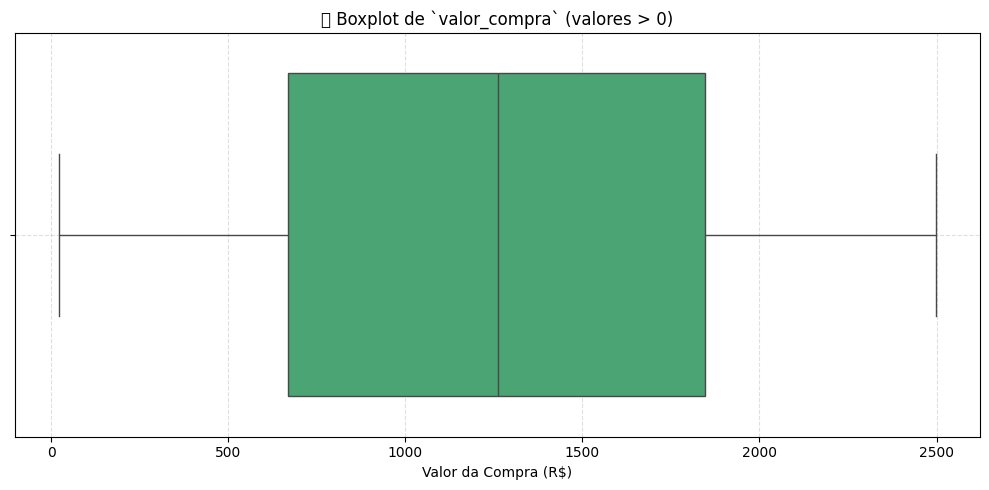

In [ ]:
# ============================================================
# 📊 6. VISUALIZAÇÃO (Boxplot)
# ============================================================

# 🔍 Filtrar valores de compra positivos
df_plot = df[df["valor_compra"] > 0]

# 📊 Replotar o gráfico com os dados limpos
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_plot["valor_compra"], color="mediumseagreen")
plt.title("📦 Boxplot de `valor_compra` (valores > 0)")
plt.xlabel("Valor da Compra (R$)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# ============================================================
# 💾 7. EXPORTAÇÃO DOS OUTLIERS DETECTADOS
# ============================================================


In [ ]:
# ============================================================
# 💾 EXPORTAÇÃO DOS OUTLIERS DETECTADOS
# ============================================================

# Selecionar apenas os registros com anomalias
df_outliers = df[df["possivel_anomalia"] == True]

# Exportar para CSV
caminho_saida = "anomalias_detectadas.csv"
df_outliers.to_csv(caminho_saida, index=False)

print(f"📁 Arquivo '{caminho_saida}' salvo com {len(df_outliers)} registros.")

📁 Arquivo 'anomalias_detectadas.csv' salvo com 35 registros.
